[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yusufokunlola/maternal-health/blob/main/notebook.ipynb)

### Context
Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.


### Data Source

Data was sourced from [Kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('MaternalHealthRisk.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# display all columns for better visibility
pd.set_option('display.max_columns', None)

In [9]:
# explore top 5 and bottom 5 data (full columns)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [10]:
# check the shape of the data
df.shape

(1014, 7)

In [11]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [12]:
# Checking for the null value.
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [13]:
# return a total count for each RiskLevel in the dataset
df.RiskLevel.value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [14]:
# check the datatype counts of the dataset
df.dtypes.value_counts()

int64      4
float64    2
object     1
Name: count, dtype: int64

In [15]:
# number of unique values in each features
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

## Exploratory Data Analysis

In [16]:
# statistical summary
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### visualize the distribution of the numerical variables

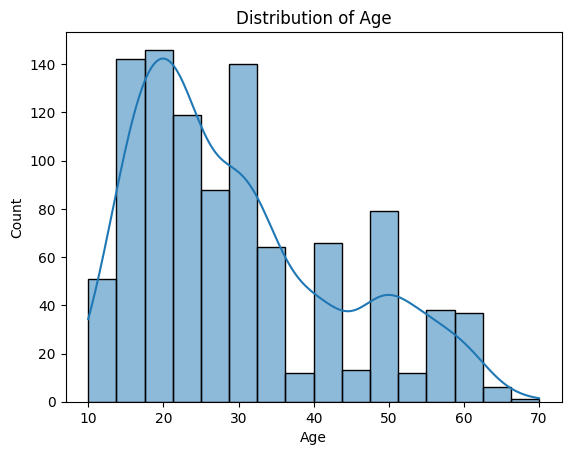

In [17]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [18]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [19]:
# Assign age distribution to a new column
# Define the conditions and corresponding designations
conditions = [
    df['Age'] <= 12,
    df['Age'] <= 17,
    df['Age'] <= 44,
    df['Age'] <= 55,
    df['Age'] <= 64
]
designations = [
    'Children',
    'Adolescents',
    'Pre-menopausal Adults',
    'Menopausal Adults',
    'Post-menopausal Adults'
]

# Use numpy.select() to create the new column
df['AgeDist'] = np.select(conditions, designations, default='Older adults')

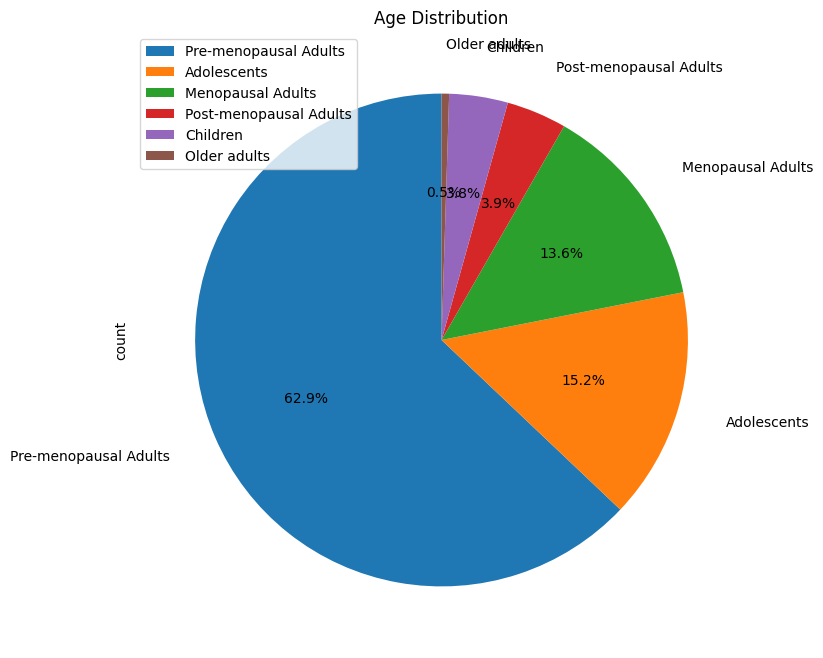

In [20]:
# Count the frequency of each value in the 'AgeDist' column
age_dist_counts = df['AgeDist'].value_counts()

# Create a pie chart of the frequency counts
age_dist_counts.plot.pie(autopct='%1.1f%%', startangle=90, labeldistance=1.2, figsize=(8, 8), legend=True)

# Set the title of the chart
plt.title('Age Distribution')

# Show the chart
plt.show()

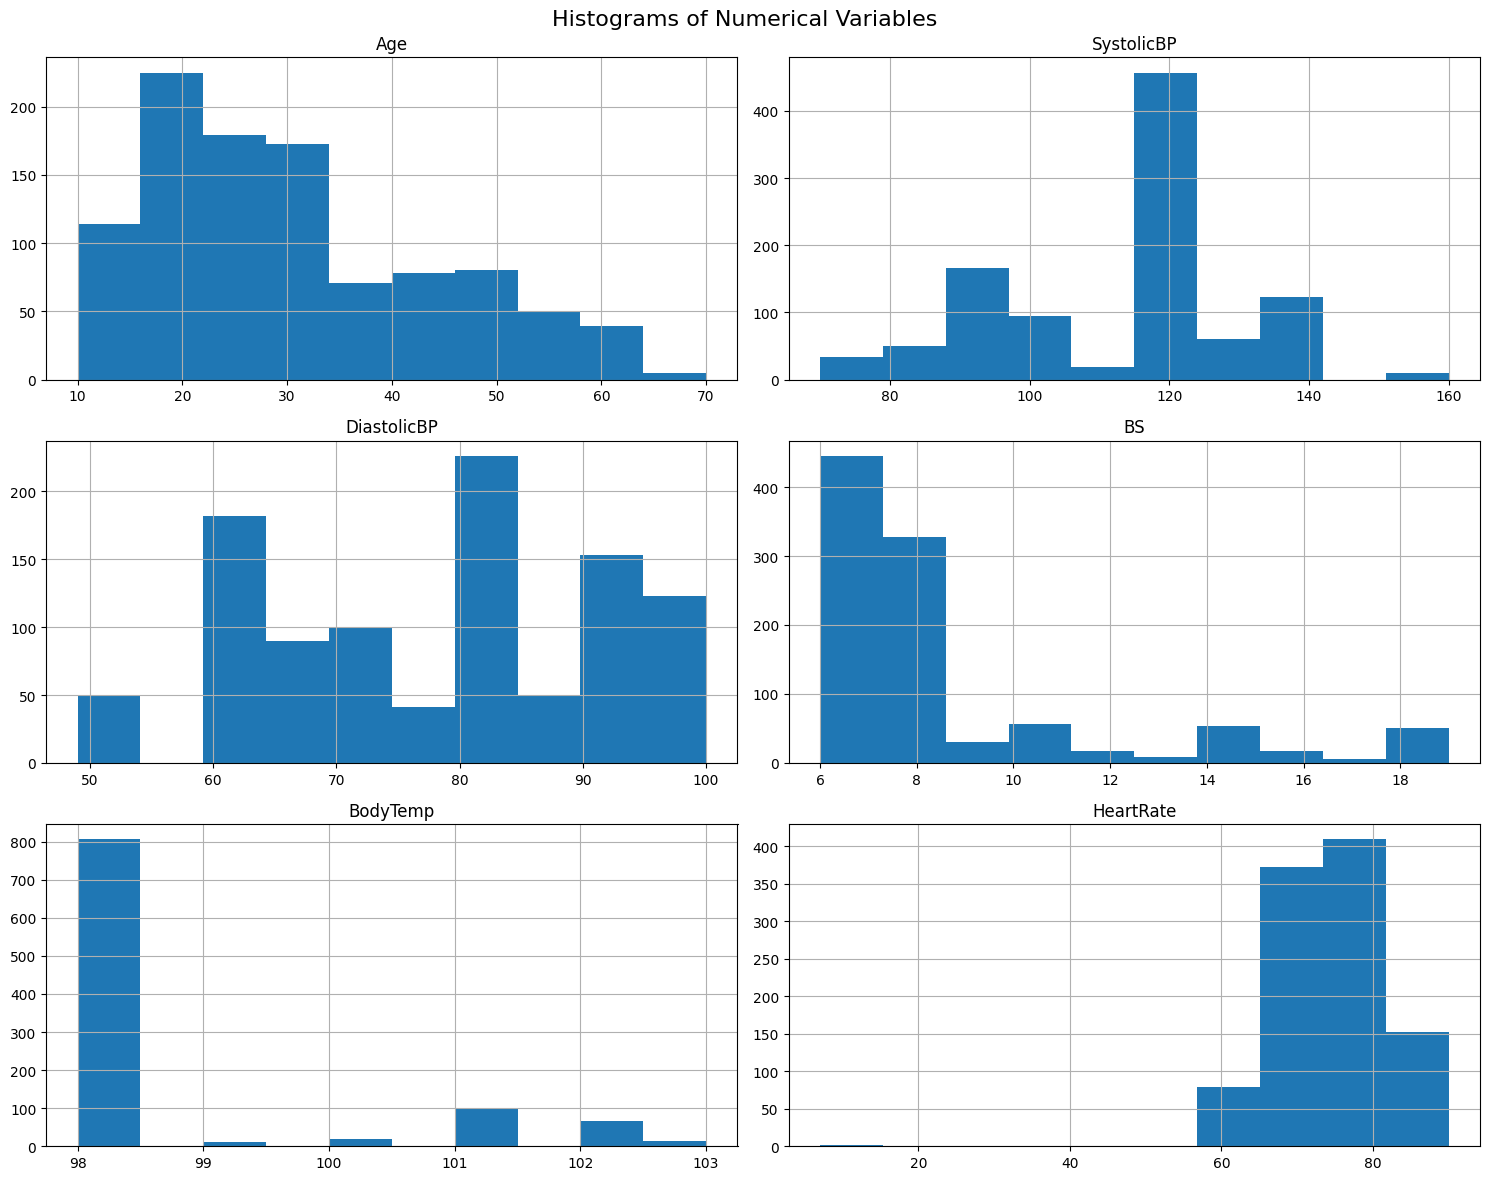

In [21]:
# Select only the numerical columns
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms for all numerical columns
df[num_cols].hist(bins=10, figsize=(15, 12))

# Add titles and axis labels
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

### visualize the relationship between the numerical variables and the target variable

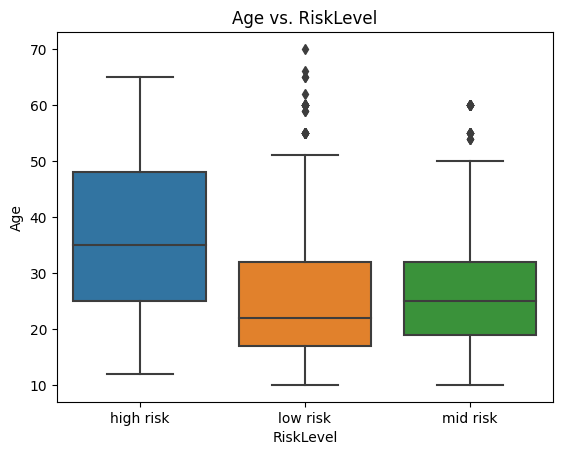

In [22]:

sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Age vs. RiskLevel')
plt.show()

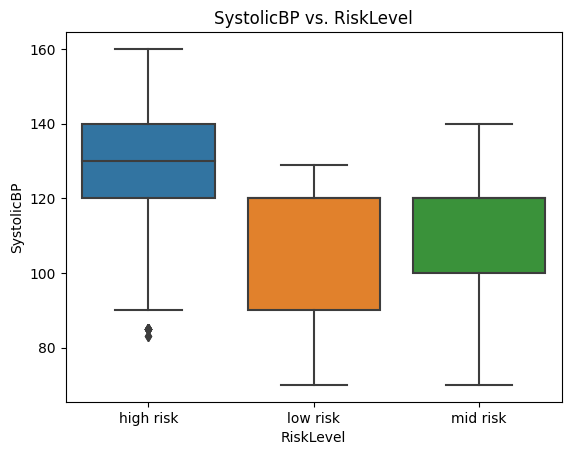

In [23]:
sns.boxplot(x='RiskLevel', y='SystolicBP', data=df)
plt.title('SystolicBP vs. RiskLevel')
plt.show()

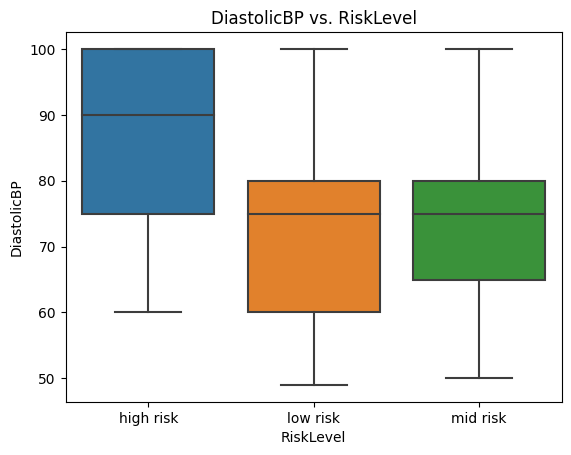

In [24]:
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=df)
plt.title('DiastolicBP vs. RiskLevel')
plt.show()

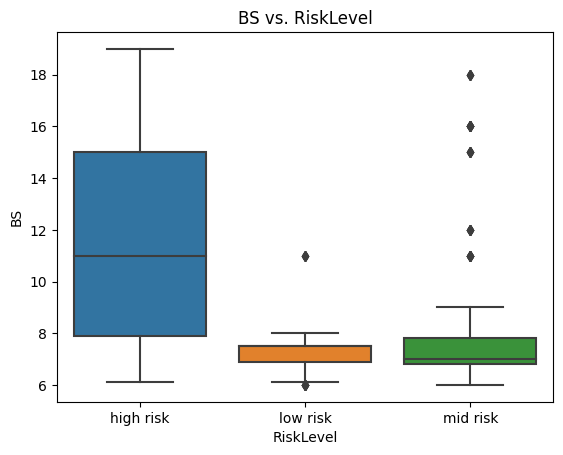

In [25]:
sns.boxplot(x='RiskLevel', y='BS', data=df)
plt.title('BS vs. RiskLevel')
plt.show()

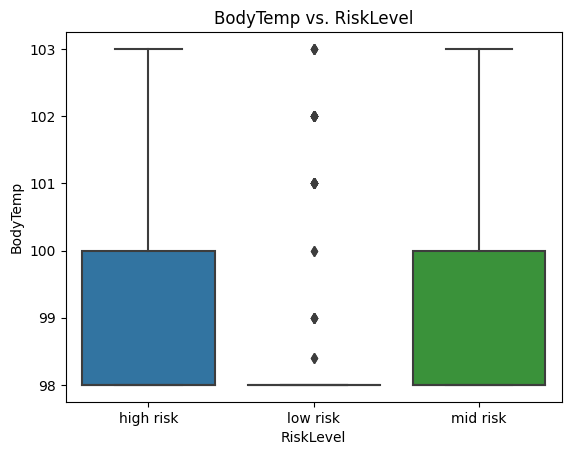

In [26]:
sns.boxplot(x='RiskLevel', y='BodyTemp', data=df)
plt.title('BodyTemp vs. RiskLevel')
plt.show()

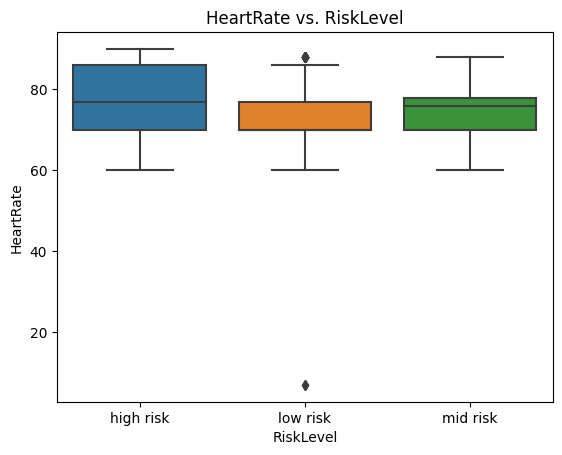

In [27]:
sns.boxplot(x='RiskLevel', y='HeartRate', data=df)
plt.title('HeartRate vs. RiskLevel')
plt.show()

In [31]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'AgeDist'],
      dtype='object')

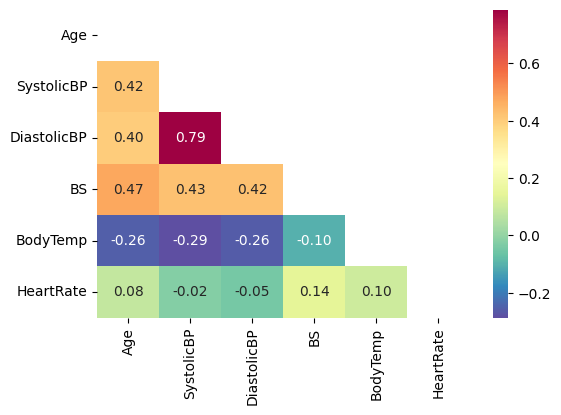

In [32]:
# correlation analysis
corrmat = df.drop(columns=['RiskLevel', 'AgeDist']).corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(6,4))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');

In [ ]:
# outlier detection

## Modeling

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# split data into train and test set
# X = df.drop(columns=['RiskLevel', 'AgeDist'])
X = df.drop(columns='RiskLevel')
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a function to detect outliers
def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
        
    return model

In [11]:
result = modeling(RandomForestClassifier(), X_train, X_test, y_train, y_test)
result

Accuracy Score:  0.8029556650246306
Confusion Matrix: 
 [[40  1  6]
 [ 4 59 17]
 [ 3  9 64]]
Classification Report: 
               precision    recall  f1-score   support

   high risk       0.85      0.85      0.85        47
    low risk       0.86      0.74      0.79        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



RandomForestClassifier()

In [12]:
result1 = modeling(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)
result1

Accuracy Score:  0.7487684729064039
Confusion Matrix: 
 [[39  4  4]
 [ 3 61 16]
 [ 5 19 52]]
Classification Report: 
               precision    recall  f1-score   support

   high risk       0.83      0.83      0.83        47
    low risk       0.73      0.76      0.74        80
    mid risk       0.72      0.68      0.70        76

    accuracy                           0.75       203
   macro avg       0.76      0.76      0.76       203
weighted avg       0.75      0.75      0.75       203



GradientBoostingClassifier()

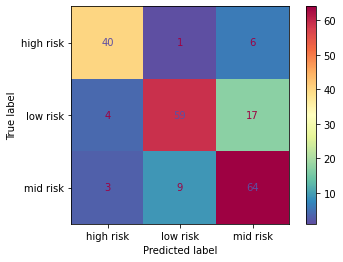

In [13]:
# plot confusion matrix for RandomForestClassifier
plot_confusion_matrix(result, X_test, y_test, cmap='Spectral_r');

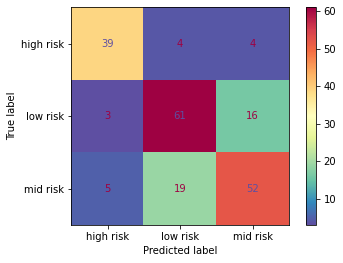

In [15]:
# plot confusion matrix for GradientBoostingClassifier
plot_confusion_matrix(result1, X_test, y_test, cmap='Spectral_r');

In [17]:
# cross validation
def cross_val(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Cross-validation scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())
    
# create a function to plot confusion matrix
def plot_conf(model, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test, cmap='Spectral_r', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()
    
# create a function to plot feature importance
def feat_importance(model, X_train, y_train):
    feat_imp = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance')
    plt.ylabel('Feature Importance Score')
    plt.show()
    
# create a function to plot ROC curve
def plot_roc(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0,1], [0,1], 'r--')
    plt.show()
    
# create a function to plot precision-recall curve
def plot_pr(model, X_test, y_test):
    plot_precision_recall_curve(model, X_test, y_test)
    plt.title('Precision-Recall Curve')
    plt.show()
    
# create a function to plot learning curve
def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
    
# create a function to plot validation curve
def plot_val_curve(model, X_train, y_train, param_name, param_range):
    train_scores, test_scores = validation_curve(model, X_train, y_train, param_name=param_name, param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(param_range, train_scores_mean, label='Training Score')
    plt.plot(param_range, test_scores_mean, label='Cross-validation Score')
    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
    

In [21]:
cross_val(RandomForestClassifier(), X_train, y_train)
modeling(RandomForestClassifier(), X_train, X_test, y_train, y_test)
# plot_conf(RandomForestClassifier(), X_test, y_test)
feat_importance(RandomForestClassifier(), X_train, y_train)

Cross-validation scores:  [0.79754601 0.7654321  0.85802469 0.85185185 0.83333333]
Mean:  0.821237597515716
Standard Deviation:  0.034963908732050866
Accuracy Score:  0.8029556650246306
Confusion Matrix: 
 [[40  1  6]
 [ 3 59 18]
 [ 3  9 64]]
Classification Report: 
               precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.74      0.79        80
    mid risk       0.73      0.84      0.78        76

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.